In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf

In [ ]:
df = pd.read_csv('Problem1 - Sunspots.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.isnull().sum())

Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64


In [ ]:
X = df.drop(['Date', 'Monthly Mean Total Sunspot Number'], axis=1)
y = df['Monthly Mean Total Sunspot Number']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'relu', input_shape=(X_train.shape[1],)))
#model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 32, activation = 'relu'))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 256, activation = 'linear'))
model.add(keras.layers.Dense(units = 512, activation = 'linear'))


model.add(keras.layers.Dense(units = 256, activation = 'linear'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 32, activation = 'relu'))
#model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_302 (Dense)           (None, 1)                 2         
                                                                 
 dense_303 (Dense)           (None, 32)                64        
                                                                 
 dense_304 (Dense)           (None, 128)               4224      
                                                                 
 dense_305 (Dense)           (None, 256)               33024     
                                                                 
 dense_306 (Dense)           (None, 512)               131584    
                                                                 
 dense_307 (Dense)           (None, 256)               131328    
                                                                 
 dense_308 (Dense)           (None, 128)             

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
82/82 [==============================] - 1s 15ms/step - loss: 4081.3633
Epoch 2/100
82/82 [==============================] - 1s 9ms/step - loss: 4143.7051
Epoch 3/100
82/82 [==============================] - 1s 10ms/step - loss: 4094.8364
Epoch 4/100
82/82 [==============================] - 1s 14ms/step - loss: 4079.6069
Epoch 5/100
82/82 [==============================] - 1s 15ms/step - loss: 4127.9336
Epoch 6/100
82/82 [==============================] - 1s 15ms/step - loss: 4097.2983
Epoch 7/100
82/82 [==============================] - 1s 10ms/step - loss: 4094.1299
Epoch 8/100
82/82 [==============================] - 1s 9ms/step - loss: 4113.8623
Epoch 9/100
82/82 [==============================] - 1s 9ms/step - loss: 4068.1611
Epoch 10/100
82/82 [==============================] - 1s 9ms/step - loss: 4094.9697
Epoch 11/100
82/82 [==============================] - 1s 9ms/step - loss: 4107.3574
Epoch 12/100
82/82 [==============================] - 1s 9ms/step - loss: 4053.

In [ ]:
y_predicted_test = model.predict(X_test)

21/21 [==============================] - 0s 4ms/step


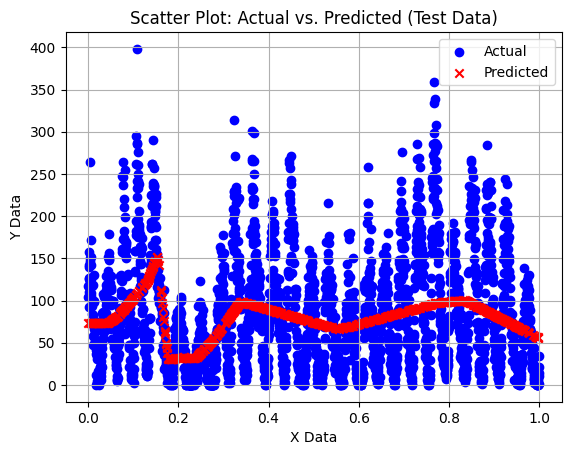

In [ ]:
plt.scatter(X_train, y_train, label='Actual', color='blue')

plt.scatter(X_test, y_predicted_test, label='Predicted', color='red', marker='x')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Scatter Plot: Actual vs. Predicted (Test Data)')
plt.legend()
plt.grid()
plt.show()